In [ ]:
!wget wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip

In [ ]:
!unzip v0.9.2.zip

In [ ]:
!cd fastText-0.9.2 && make && pip install .

In [ ]:
!unzip train_tweets.txt.zip

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd

train_data = pd.read_csv('train_tweets.txt', sep = '\t', header = None)

In [ ]:
y = train_data[0]
tweets = train_data[1]

labels: 9293
samples: 328195


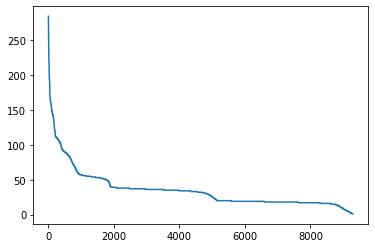

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

print('labels:', len(set(y)))
print('samples:', len(tweets))

distt = Counter(y)
counts = []

for key, val in distt.most_common():
    counts.append(val)

plt.plot(counts)

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased", do_lower_case = False)

token_ls = []

for labl, tweet in zip(y, tweets):
  nLabl = ['__label__' + str(labl)]
  nTweet = tokenizer.encode(tweet)
  token_ls.append(nLabl + nTweet)

Token indices sequence length is longer than the specified maximum sequence length for this model (2169 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
ds_lines = []

for ls in token_ls:
  line = ' '.join([str(x) for x in ls])
  ds_lines.append(line)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(ds_lines, test_size = 0.25, random_state = 42)

In [ ]:
with open('train_tweets_fs.txt', 'w') as fp:
  for line in X_train:
    fp.write(line + '\n')

with open('test_tweets_fs.txt', 'w') as fp:
  for line in X_test:
    fp.write(line + '\n')

In [ ]:
import fasttext

model = fasttext.train_supervised(input="train_tweets_fs.txt", loss = 'hs',
                                  epoch = 100, wordNgrams = 3, thread = 16)

In [ ]:
model.test('test_tweets_fs.txt')

(82037, 0.16330436266562648, 0.16330436266562648)